In [1]:
%matplotlib inline
from galaxy_analysis.plot.plot_styles import *
import matplotlib.pyplot as plt
import numpy as np
import yt
from galaxy_analysis.analysis import Galaxy
import deepdish as dd

/home/aemerick/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/aemerick/code/galaxy_analysis/particle_analysis/IMF.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/aemerick/anaconda2/lib/python2.7/sit

/home/aemerick/code/galaxy_analysis/particle_analysis/sn_rate.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", li

/home/aemerick/code/galaxy_analysis/plot/plot_styles.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 477, i

In [2]:
dsname = 'DD0871'; wdir   = 'sn_H2atten_H2sh'
#dsname = 'DD0613'; wdir   = 'sn_H2atten_H2_shortrad'


gal = Galaxy(dsname,wdir='/home/aemerick/work/enzo_runs/' + wdir + '/')
data = dd.io.load('/home/aemerick/work/enzo_runs/' + wdir + '/' + dsname + '_galaxy_data.h5')
onezdata = np.genfromtxt("/home/aemerick/code/onezone/examples/temp/summary_output.txt",names=True)

masses = {}
for e in data['gas_meta_data']['masses']['FullBox'].keys():
    if 'H' in e or 'Total' in e:
        continue
    masses[e] = data['gas_meta_data']['masses']['FullBox'][e] + data['gas_meta_data']['masses']['OutsideBox'][e]
    
mdata = data['gas_meta_data']['masses']


onez_scale = 8.0E5 / onezdata['M_star'][-1]

scale_factors = {}
for e in masses.keys():
    if not e + '_mass' in onezdata.dtype.names:
        continue
        
    scale_factors[e] = (onezdata[e + '_mass'][-1] * onez_scale) / masses[e]


Parsing Hierarchy : 100%|██████████| 1227/1227 [00:00<00:00, 47554.20it/s]
/home/aemerick/anaconda2/lib/python2.7/site-packages/yt/fields/local_fields.py:46: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  warnings.warn("Because 'sampling_type' not specified, yt will "


tracer species present:  ['C', 'N', 'O', 'Na', 'Mg', 'Si', 'S', 'Ca', 'Mn', 'Fe', 'Ni', 'As', 'Sr', 'Y', 'Ba']
16 mass fields defined
16 mass fraction fields defined
15 number density fields defined
6 ionization state fields defined
141 abundance ratio fields defined
141 particle abundance ratio fields defined
5 additional helper fields defined


Parsing Hierarchy : 100%|██████████| 1227/1227 [00:00<00:00, 47713.36it/s]
/home/aemerick/code/onezone/data_tables.py:90: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if  c == flag or id == flag:


In [3]:

from yt import derived_field

@derived_field(name='CIV_scaled',units='cm**(-3)')
def CIV_scaled(field,data):    
    return scale_factors['C'] * data['CIV_Number_Density']
@derived_field(name='OVI_scaled',units='cm**(-3)')
def OVI_scaled(field,data):
    return scale_factors['O'] * data['OVI_Number_Density']
@derived_field(name='SIV_scaled',units='cm**(-3)')
def SIV_scaled(field,data):
    return scale_factors['Si'] * data['SiIV_Number_Density']

gal.ds.add_field(("gas", "CIV_scaled"), function=CIV_scaled, units="cm**(-3)")
gal.ds.add_field(("gas", "OVI_scaled"), function=OVI_scaled, units="cm**(-3)")
gal.ds.add_field(("gas", "SiIV_scaled"), function=SIV_scaled, units="cm**(-3)")


/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  
/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  from ipykernel import kernelapp as app
/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  app.launch_new_instance()


In [3]:
#gal = Galaxy('DD0619',wdir='/home/aemerick/work/enzo_runs/sn_H2atten_H2sh/')
#data = dd.io.load('/home/aemerick/work/enzo_runs/sn_H2atten_H2sh/DD0619_galaxy_data.h5')

Parsing Hierarchy : 100%|██████████| 422/422 [00:00<00:00, 50089.04it/s]


In [12]:
#gal2 = Galaxy('DD0619',wdir='/home/aemerick/work/enzo_runs/sn_H2atten_H2sh/')
#data2 = dd.io.load('/home/aemerick/work/enzo_runs/sn_H2atten_H2sh/DD0619_galaxy_data.h5')

['Ni',
 'Na',
 'Mg',
 'HI',
 'Total Tracked Metals',
 'Ba',
 'Fe',
 'Sr',
 'HII',
 'He',
 'C',
 'H',
 'Mn',
 'O',
 'N',
 'Si',
 'Y',
 'H2',
 'Ca',
 'S',
 'Metals',
 'As',
 'Total']

In [17]:
elements = ['O','N']
prof = yt.Profile1D(gal.halo_sphere, 'radius', 128.0, 1.0*yt.units.pc, 
             30.0E3*yt.units.pc, x_log = True, weight_field = None)


In [32]:
prof.add_fields(['O_Mass','N_Mass','Ba_Mass','Mg_Mass','Fe_Mass'])

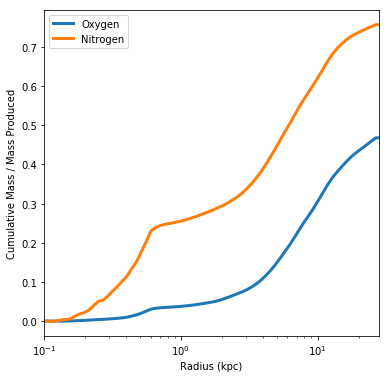

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(6,6)

r = prof.x.to('kpc').value
O = np.cumsum(prof['O_Mass'].to('Msun').value) / masses['O']
N = np.cumsum(prof['N_Mass'].to('Msun').value) / masses['N']

ax.plot(r, O, lw = 3, label = 'Oxygen')
ax.plot(r, N, lw = 3, label = 'Nitrogen')
ax.semilogx()
ax.set_xlim(0.1,28.0)

ax.set_xlabel(r'Radius (kpc)')
ax.set_ylabel('Cumulative Mass / Mass Produced')
ax.legend(loc = 'best')


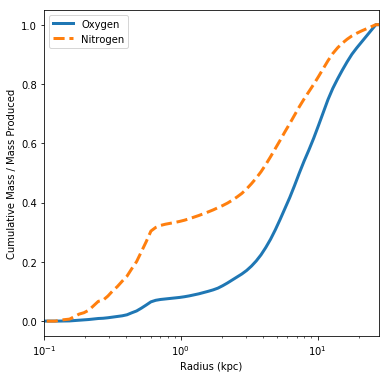

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(6,6)

r = prof.x.to('kpc').value
O = np.cumsum(prof['O_Mass'].to('Msun').value) #/ (mdata['FullBox']['O'] - mdata['Disk']['N'])
N = np.cumsum(prof['N_Mass'].to('Msun').value) #/ (mdata['FullBox']['N'] - mdata['Disk']['N'])
Ba = np.cumsum(prof['Ba_Mass'].to('Msun').value) #/ (mdata['FullBox']['N'] - mdata['Disk']['N'])
Mg = np.cumsum(prof['Mg_Mass'].to('Msun').value) #/ (mdata['FullBox']['N'] - mdata['Disk']['N'])
Fe = np.cumsum(prof['Fe_Mass'].to('Msun').value) #/ (mdata['FullBox']['N'] - mdata['Disk']['N'])



ax.plot(r, O/O[-1], lw= 3, label = 'Oxygen')
#ax.plot(r, Mg/Mg[-1], lw = 3, label = 'Magnesium')
ax.plot(r, N/N[-1], lw = 3,  ls = '--',label = 'Nitrogen')
#ax.plot(r, Ba/Ba[-1], lw = 3, ls = '--', label = 'Barium')
#ax.plot(r, Fe/Fe[-1], lw = 3, ls = ':', label = 'Iron')

ax.semilogx()
ax.set_xlim(0.1,28.0)

ax.set_xlabel(r'Radius (kpc)')
ax.set_ylabel('Cumulative Mass / Mass Produced')
ax.legend(loc = 'best')



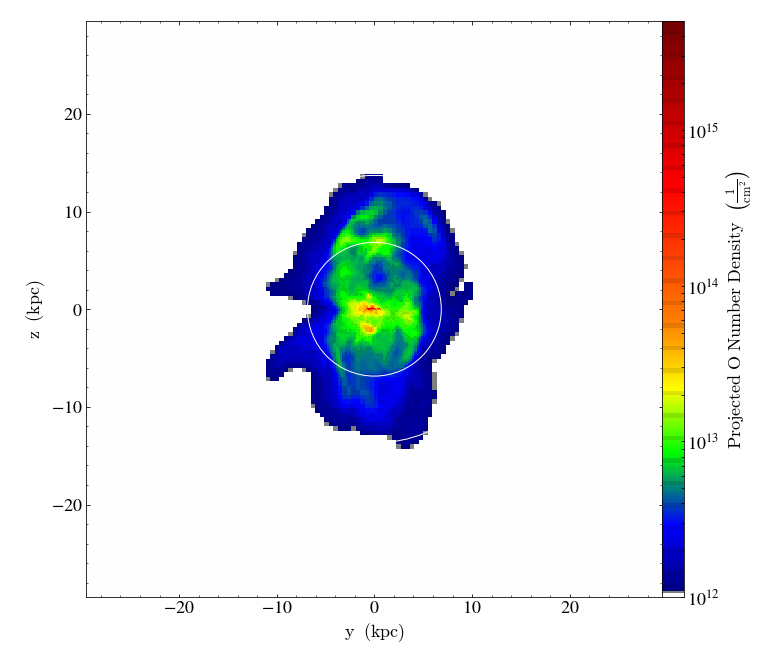

In [56]:
proj = yt.ProjectionPlot(gal.ds, 'x', 'O_Number_Density', weight_field = None)
                         
proj.set_buff_size(2048)
proj.annotate_sphere(center = [0.5,0.5,0.5], radius = (27.4,'kpc'))
proj.annotate_sphere(center = [0.5,0.5,0.5], radius = (27.4/2.0,'kpc'))
proj.annotate_sphere(center = [0.5,0.5,0.5], radius = (27.4/4.0,'kpc'))

proj.set_cmap('O_Number_Density','Eos B')
proj.set_zlim('O_Number_Density',1.0E12,5.0E15)
proj.show()


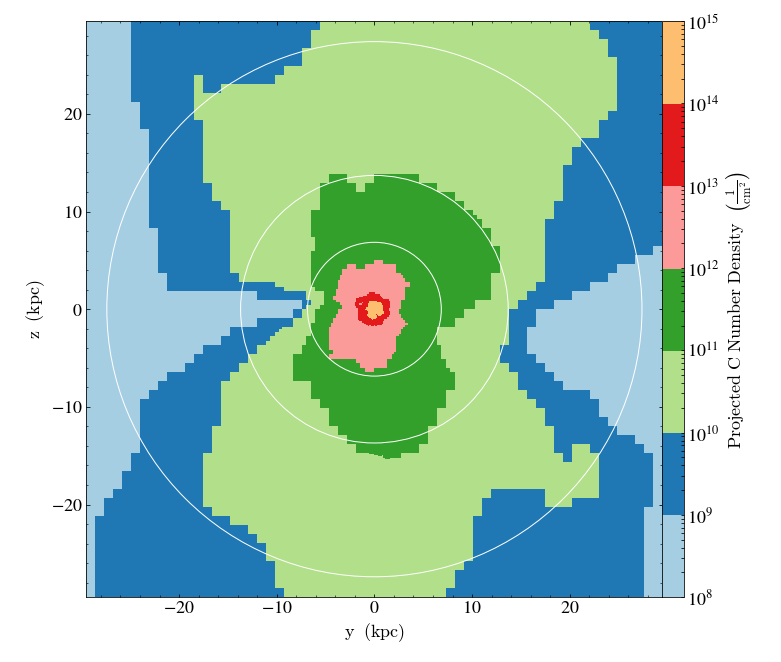

['DD0613_Projection_x_C_Number_Density.png']

In [4]:
proj = yt.ProjectionPlot(gal.ds, 'x', 'C_Number_Density', weight_field = None)
                         
proj.set_buff_size(512)
proj.annotate_sphere(center = [0.5,0.5,0.5], radius = (27.4,'kpc'))
proj.annotate_sphere(center = [0.5,0.5,0.5], radius = (27.4/2.0,'kpc'))
proj.annotate_sphere(center = [0.5,0.5,0.5], radius = (27.4/4.0,'kpc'))

proj.set_cmap('C_Number_Density', ('Paired','Qualitative',7))
proj.set_zlim('C_Number_Density',1.0E8,1.0E15)
proj.show()
proj.save()


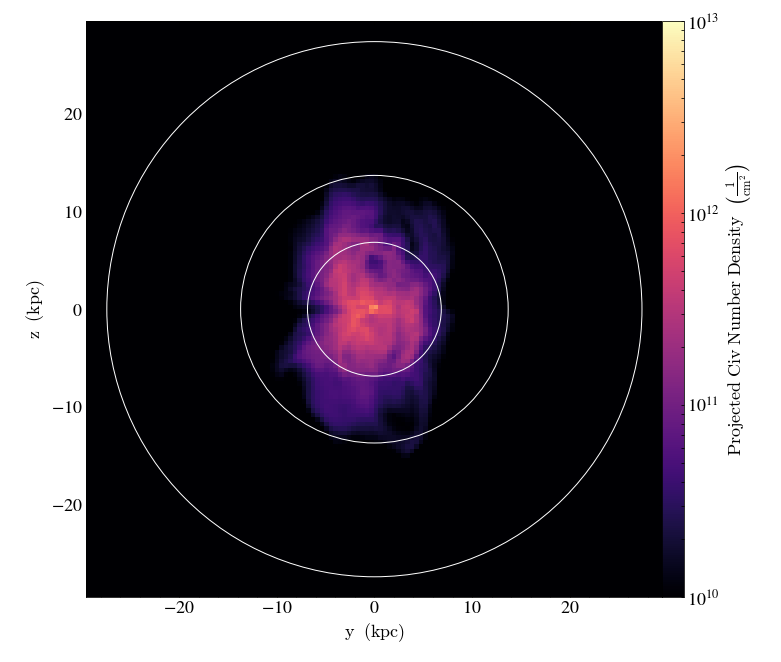

In [6]:
proj = yt.ProjectionPlot(gal.ds, 'x', 'CIV_Number_Density', weight_field = None)
                         
proj.set_buff_size(128)
proj.annotate_sphere(center = [0.5,0.5,0.5], radius = (27.4,'kpc'))
proj.annotate_sphere(center = [0.5,0.5,0.5], radius = (27.4/2.0,'kpc'))
proj.annotate_sphere(center = [0.5,0.5,0.5], radius = (27.4/4.0,'kpc'))

proj.set_cmap('CIV_Number_Density','magma')
proj.set_zlim('CIV_Number_Density', 1.0E10, 1.0E15)
proj.show()


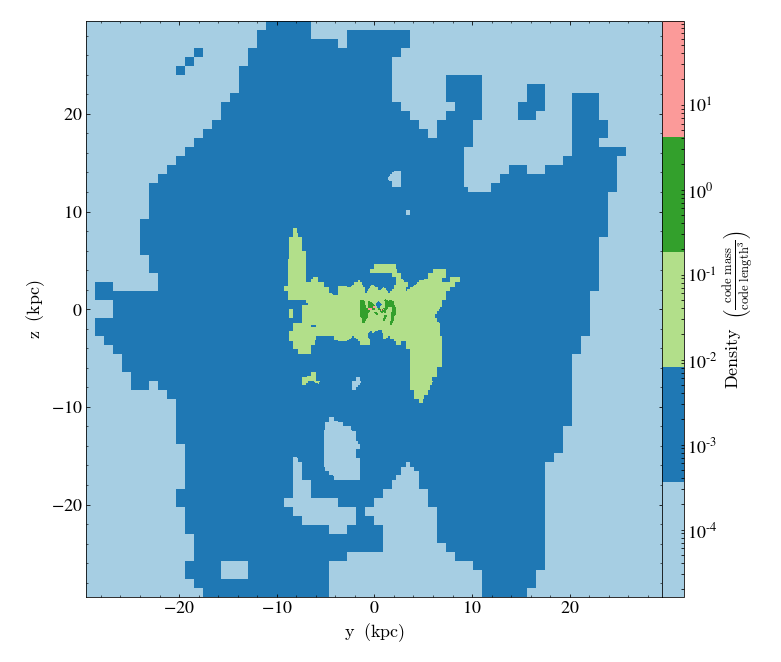

In [15]:
import palettable
cmap = ('Paired','Qualitative',5)

s = yt.SlicePlot(gal.ds,'x','Density')
s.set_cmap('Density', ('Paired','Qualitative',5))
s.show()


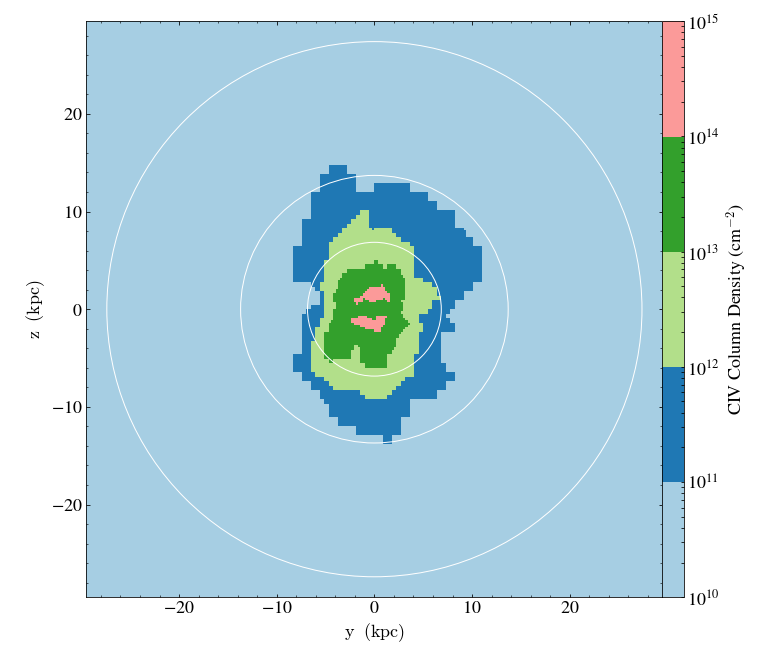


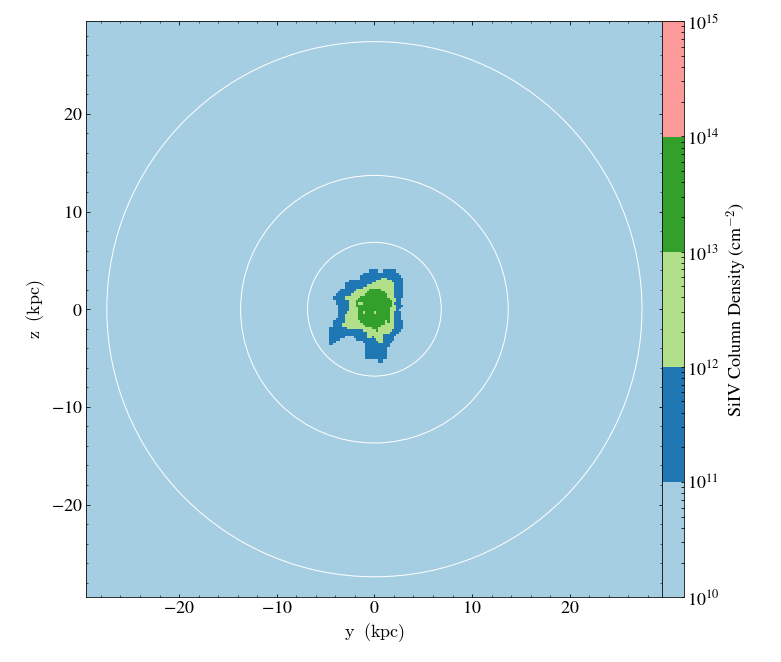

In [5]:
cmap = ('Paired','Qualitative',5)
labels = {'CIV_scaled' : r"CIV Column Density (cm$^{-2}$)",
          'SiIV_scaled' : r"SiIV Column Density (cm$^{-2}$)"}

for f in ['CIV_scaled', 'SiIV_scaled']:
    proj = yt.ProjectionPlot(gal.ds, 'x', f, weight_field = None)
                         
    proj.set_buff_size(256)
    proj.annotate_sphere(center = [0.5,0.5,0.5], radius = (27.4,'kpc'))
    proj.annotate_sphere(center = [0.5,0.5,0.5], radius = (27.4/2.0,'kpc'))
    proj.annotate_sphere(center = [0.5,0.5,0.5], radius = (27.4/4.0,'kpc'))

    proj.set_cmap(f, cmap)
    proj.set_zlim(f, 1.0E10, 1.0E15)
    proj.set_colorbar_label(f, labels[f])
    proj.show()
    proj.save()

13



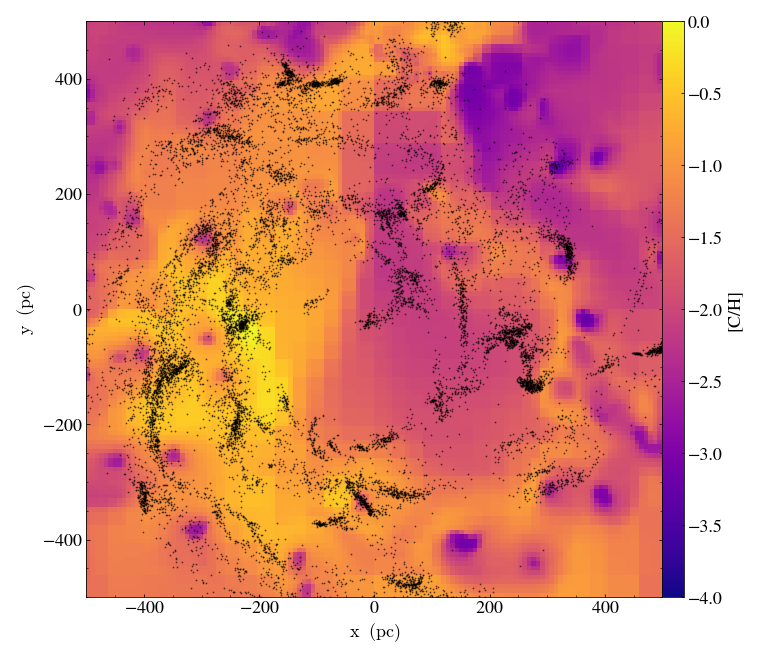

In [41]:
cmap = ('Paired','Qualitative',7)
labels = {'CIV_scaled' : r"CIV Column Density (cm$^{-2}$)",
          'SiIV_scaled' : r"SiIV Column Density (cm$^{-2}$)", 'C_Number_Density' : r'C Column Density (cm$^{-2}$)'}

disk = gal.ds.disk( [0.5]*3, [0,0,1], 2*yt.units.kpc, 2*yt.units.kpc)


px = (gal.df['particle_position_x'] - gal.ds.domain_center[0]).to('pc').value
py = (gal.df['particle_position_y'] - gal.ds.domain_center[1]).to('pc').value
pt = gal.df['particle_type']
bm = gal.df['birth_mass']

massive = (bm > 8.0)*(pt==11)
small   = (bm < 8.0)*(pt==11)
print np.size(px[massive])

for f in ['C_over_H']: #,'CIV_scaled']:#, 'SiIV_scaled']:
    proj = yt.ProjectionPlot(gal.ds, 'z', f, weight_field = 'density', width = (1000.0,'pc'), data_source = disk)
                         
    proj.set_buff_size(128)
    proj.annotate_sphere(center = [0.5,0.5,0.5], radius = (27.4,'kpc'))
    proj.annotate_sphere(center = [0.5,0.5,0.5], radius = (27.4/2.0,'kpc'))
    proj.annotate_sphere(center = [0.5,0.5,0.5], radius = (27.4/4.0,'kpc'))
    proj.set_log(f,False)
    #proj.set_cmap(f,'')
    proj.set_cmap(f, 'plasma')
    proj.set_zlim(f,-4,0)
    #proj.set_zlim(f, 1.0E9, 1.0E16)
    #proj.set_colorbar_label(f, labels[f])
    #proj.annotate_contour('number_density', take_log = True, clim=(1.0,1.0E2), ncont = 3, factor = 2)
    proj.set_colorbar_label(f, '[C/H]')
    proj.save()
    image = proj.plots[f]
    image.axes.scatter(px[small], py[small], s = 0.75, marker = 'o', color  = 'black', alpha = 0.5)

    #image.axes.scatter(px[massive], py[massive], s = 100, marker = '*', color  = 'black', alpha = 0.5)
    proj.save()
    proj.show()

13



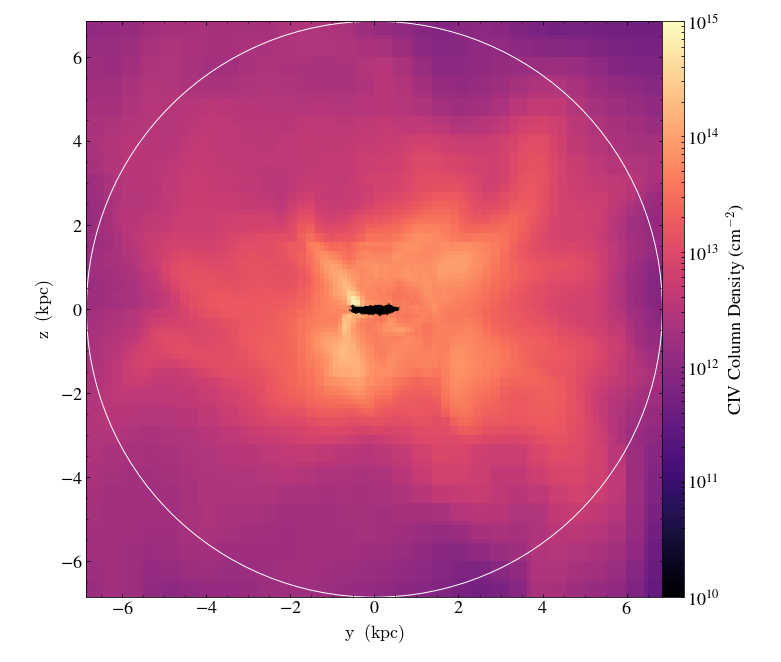

In [51]:
cmap = ('Paired','Qualitative',7)
labels = {'CIV_scaled' : r"CIV Column Density (cm$^{-2}$)",
          'SiIV_scaled' : r"SiIV Column Density (cm$^{-2}$)", 'C_Number_Density' : r'C Column Density (cm$^{-2}$)'}

disk = gal.ds.disk( [0.5]*3, [0,0,1], 10*yt.units.kpc, 10*yt.units.kpc)


px = (gal.df['particle_position_x'] - gal.ds.domain_center[0]).to('kpc').value
py = (gal.df['particle_position_y'] - gal.ds.domain_center[1]).to('kpc').value
pz = (gal.df['particle_position_z'] - gal.ds.domain_center[2]).to('kpc').value

pt = gal.df['particle_type']
bm = gal.df['birth_mass']

massive = (bm > 8.0)*(pt==11)
small   = (bm < 8.0)*(pt==11)
print np.size(px[massive])

for f in ['CIV_scaled']:#, 'SiIV_scaled']:
    proj = yt.ProjectionPlot(gal.ds, 'x', f, weight_field = None, width = (27.4/4.0 * 2.0,'kpc'))
                             #data_source = disk)
                         
    proj.set_buff_size(128)
    proj.annotate_sphere(center = [0.5,0.5,0.5], radius = (27.4,'kpc'))
    proj.annotate_sphere(center = [0.5,0.5,0.5], radius = (27.4/2.0,'kpc'))
    proj.annotate_sphere(center = [0.5,0.5,0.5], radius = (27.4/4.0,'kpc'))
    #proj.set_log(f,False)
    #proj.set_cmap(f,'')
    proj.set_cmap(f, 'magma')
    proj.set_zlim(f, 1.0E10, 1.0E15)
    #proj.set_zlim(f, 1.0E9, 1.0E16)
    proj.set_colorbar_label(f, labels[f])
    #proj.annotate_contour('number_density', take_log = True, clim=(1.0,1.0E2), ncont = 3, factor = 2)
    #proj.set_colorbar_label(f, '[C/H]')
    proj.save()
    image = proj.plots[f]
    image.axes.scatter(py[small], pz[small], s = 0.25, marker = 'o', color  = 'black', alpha = 0.5)

    #image.axes.scatter(px[massive], py[massive], s = 100, marker = '*', color  = 'black', alpha = 0.5)
    proj.save()
    proj.show()

13



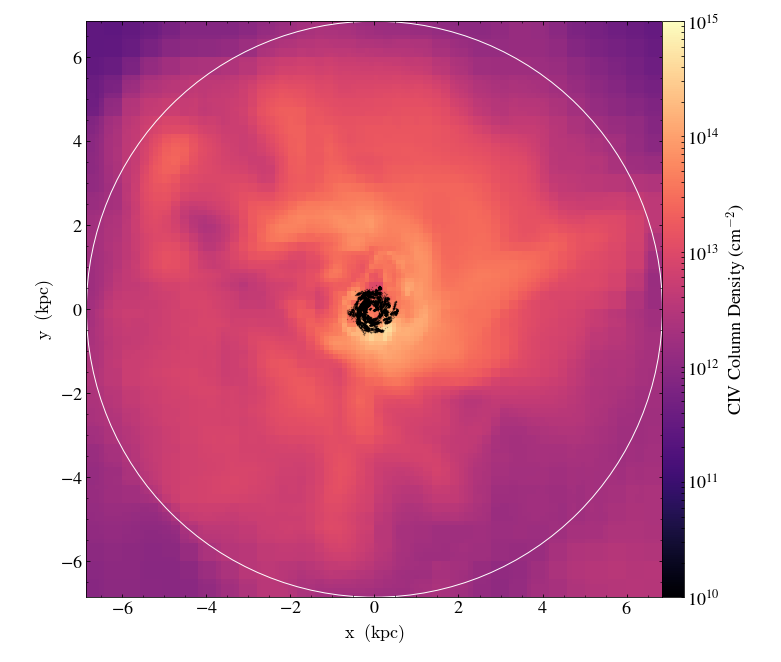

In [61]:
cmap = ('Paired','Qualitative',7)
labels = {'CIV_scaled' : r"CIV Column Density (cm$^{-2}$)",
          'SiIV_scaled' : r"SiIV Column Density (cm$^{-2}$)", 'C_Number_Density' : r'C Column Density (cm$^{-2}$)'}

disk = gal.ds.disk( [0.5]*3, [0,0,1], 10*yt.units.kpc, 10*yt.units.kpc)


px = (gal.df['particle_position_x'] - gal.ds.domain_center[0]).to('kpc').value
py = (gal.df['particle_position_y'] - gal.ds.domain_center[1]).to('kpc').value
pz = (gal.df['particle_position_z'] - gal.ds.domain_center[2]).to('kpc').value

pt = gal.df['particle_type']
bm = gal.df['birth_mass']

massive = (bm > 8.0)*(pt==11)
small   = (bm < 8.0)*(pt==11)
print np.size(px[massive])

for f in ['CIV_scaled']:#, 'SiIV_scaled']:
    proj = yt.ProjectionPlot(gal.ds, 'z', f, weight_field = None, width = (27.4/4.0 * 2.0,'kpc'))
                             #data_source = disk)
                         
    proj.set_buff_size(128)
    proj.annotate_sphere(center = [0.5,0.5,0.5], radius = (27.4,'kpc'))
    proj.annotate_sphere(center = [0.5,0.5,0.5], radius = (27.4/2.0,'kpc'))
    proj.annotate_sphere(center = [0.5,0.5,0.5], radius = (27.4/4.0,'kpc'))
    #proj.set_log(f,False)
    proj.set_zlim(f, 1.0E10, 1.0E15)
    proj.set_cmap(f, 'magma')
   # proj.set_zlim(f,-4,0)
    #proj.set_zlim(f, 1.0E9, 1.0E16)
    proj.set_colorbar_label(f, labels[f])
    #proj.annotate_contour('number_density', take_log = True, clim=(1.0,1.0E2), ncont = 3, factor = 2)
    #proj.set_colorbar_label(f, '[C/H]')
    proj.save()
    image = proj.plots[f]
    image.axes.scatter(px[small], py[small], s = 0.075, marker = 'o', color  = 'black', alpha = 0.5)

    #image.axes.scatter(px[massive], py[massive], s = 100, marker = '*', color  = 'black', alpha = 0.5)
    proj.save()
    proj.show()

13



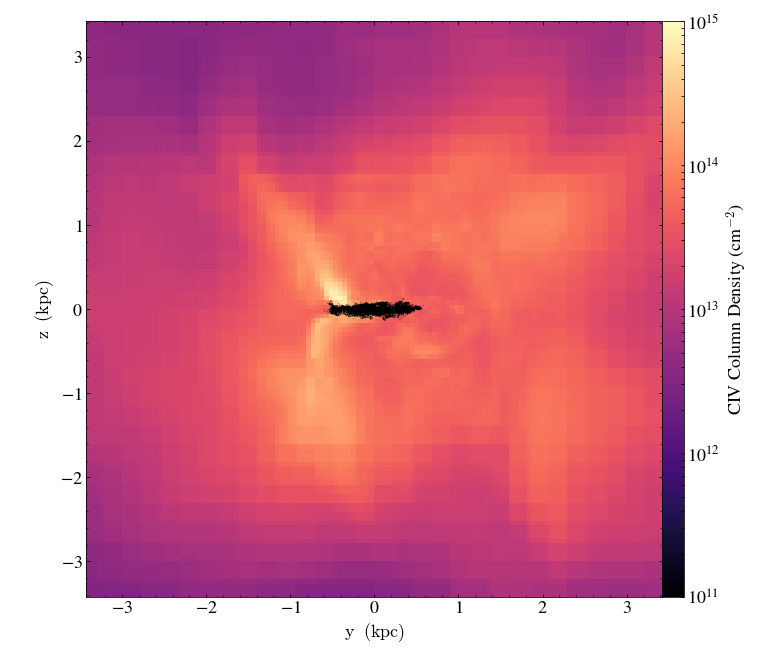

In [62]:
cmap = ('Paired','Qualitative',7)
labels = {'CIV_scaled' : r"CIV Column Density (cm$^{-2}$)",
          'SiIV_scaled' : r"SiIV Column Density (cm$^{-2}$)", 'C_Number_Density' : r'C Column Density (cm$^{-2}$)'}

disk = gal.ds.disk( [0.5]*3, [0,0,1], 10*yt.units.kpc, 10*yt.units.kpc)


px = (gal.df['particle_position_x'] - gal.ds.domain_center[0]).to('kpc').value
py = (gal.df['particle_position_y'] - gal.ds.domain_center[1]).to('kpc').value
pz = (gal.df['particle_position_z'] - gal.ds.domain_center[2]).to('kpc').value

pt = gal.df['particle_type']
bm = gal.df['birth_mass']

massive = (bm > 8.0)*(pt==11)
small   = (bm < 8.0)*(pt==11)
print np.size(px[massive])

for f in ['CIV_scaled']:#, 'SiIV_scaled']:
    proj = yt.ProjectionPlot(gal.ds, 'x', f, weight_field = None, width = (27.4/4.0,'kpc'))
                             #data_source = disk)
                         
    proj.set_buff_size(128)
    proj.annotate_sphere(center = [0.5,0.5,0.5], radius = (27.4,'kpc'))
    proj.annotate_sphere(center = [0.5,0.5,0.5], radius = (27.4/2.0,'kpc'))
    proj.annotate_sphere(center = [0.5,0.5,0.5], radius = (27.4/4.0,'kpc'))
    #proj.set_log(f,False)
    #proj.set_cmap(f,'')
    proj.set_cmap(f, 'magma')
    proj.set_zlim(f, 1.0E11, 1.0E15)
    #proj.set_zlim(f, 1.0E9, 1.0E16)
    proj.set_colorbar_label(f, labels[f])
    #proj.annotate_contour('number_density', take_log = True, clim=(1.0,1.0E2), ncont = 3, factor = 2)
    #proj.set_colorbar_label(f, '[C/H]')
    proj.save('test.png')
    image = proj.plots[f]
    image.axes.scatter(py[small], pz[small], s = 0.1, marker = 'o', color  = 'black', alpha = 0.5)

    #image.axes.scatter(px[massive], py[massive], s = 100, marker = '*', color  = 'black', alpha = 0.5)
    proj.save('test.png')
    proj.show()

13



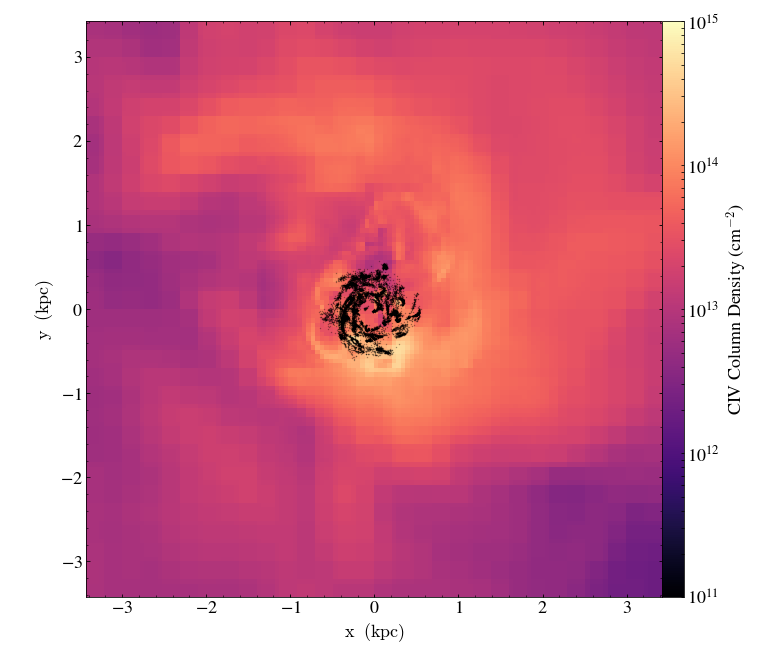

In [63]:
cmap = ('Paired','Qualitative',7)
labels = {'CIV_scaled' : r"CIV Column Density (cm$^{-2}$)",
          'SiIV_scaled' : r"SiIV Column Density (cm$^{-2}$)", 'C_Number_Density' : r'C Column Density (cm$^{-2}$)'}

disk = gal.ds.disk( [0.5]*3, [0,0,1], 10*yt.units.kpc, 10*yt.units.kpc)


px = (gal.df['particle_position_x'] - gal.ds.domain_center[0]).to('kpc').value
py = (gal.df['particle_position_y'] - gal.ds.domain_center[1]).to('kpc').value
pz = (gal.df['particle_position_z'] - gal.ds.domain_center[2]).to('kpc').value

pt = gal.df['particle_type']
bm = gal.df['birth_mass']

massive = (bm > 8.0)*(pt==11)
small   = (bm < 8.0)*(pt==11)
print np.size(px[massive])

for f in ['CIV_scaled']:#, 'SiIV_scaled']:
    proj = yt.ProjectionPlot(gal.ds, 'z', f, weight_field = None, width = (27.4/4.0,'kpc'))
                             #data_source = disk)
                         
    proj.set_buff_size(128)
    proj.annotate_sphere(center = [0.5,0.5,0.5], radius = (27.4,'kpc'))
    proj.annotate_sphere(center = [0.5,0.5,0.5], radius = (27.4/2.0,'kpc'))
    proj.annotate_sphere(center = [0.5,0.5,0.5], radius = (27.4/4.0,'kpc'))
    #proj.set_log(f,False)
    proj.set_zlim(f, 1.0E11, 1.0E15)
    proj.set_cmap(f, 'magma')
   # proj.set_zlim(f,-4,0)
    #proj.set_zlim(f, 1.0E9, 1.0E16)
    proj.set_colorbar_label(f, labels[f])
    #proj.annotate_contour('number_density', take_log = True, clim=(1.0,1.0E2), ncont = 3, factor = 2)
    #proj.set_colorbar_label(f, '[C/H]')
    proj.save('test2.png')
    image = proj.plots[f]
    image.axes.scatter(px[small], py[small], s = 0.1, marker = 'o', color  = 'black', alpha = 0.5)

    #image.axes.scatter(px[massive], py[massive], s = 100, marker = '*', color  = 'black', alpha = 0.5)
    proj.save('test2.png')
    proj.show()